__Notebook Author__: Hamed Qazanfari  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hamedmit/machine-learning-and-neural-networks-course/blob/main/Session_06_PCA/Session_06_PCA.ipynb)
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/hamedmit/machine-learning-and-neural-networks-course/main/Session_01_Introduction/Session_01_Introduction.ipynb)

---

## 🔷 Session_06_PCA


# جلسه ششم — کاهش ابعاد با PCA

## مثال بسیار مهم — نمایش داده سه بعدی در دو بعدی


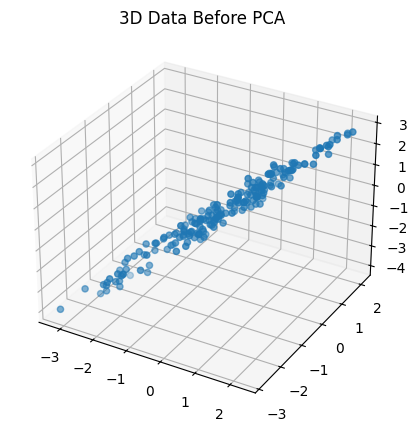

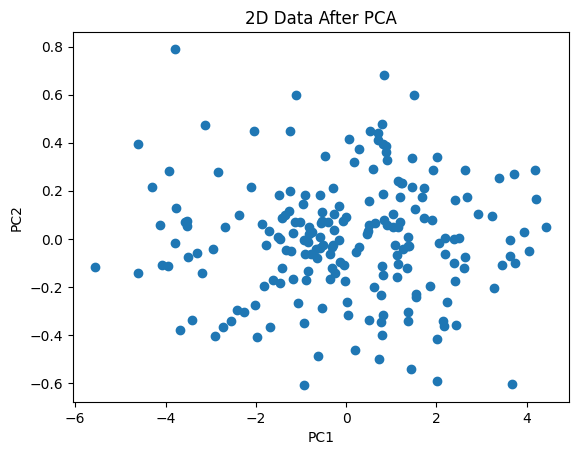

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# ساخت داده 3D
np.random.seed(0)
X = np.dot(np.random.rand(3,3), np.random.randn(3,200)).T

# رسم سه بعدی
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
plt.title("3D Data Before PCA")
plt.show()

# PCA به 2 بعد
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

# رسم دو بعدی
plt.scatter(X2[:,0], X2[:,1])
plt.title("2D Data After PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


یک مثال تصویری با کد (برای کلاس فوق‌العاده جذاب)

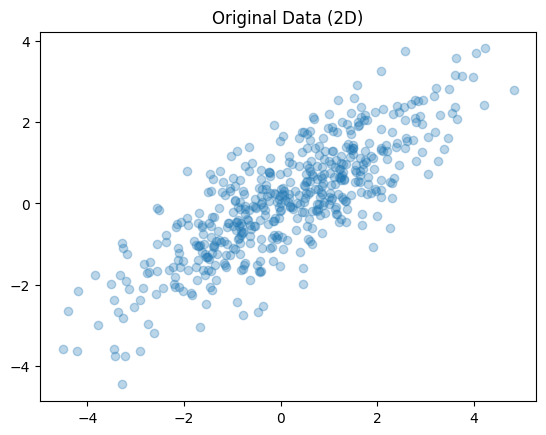

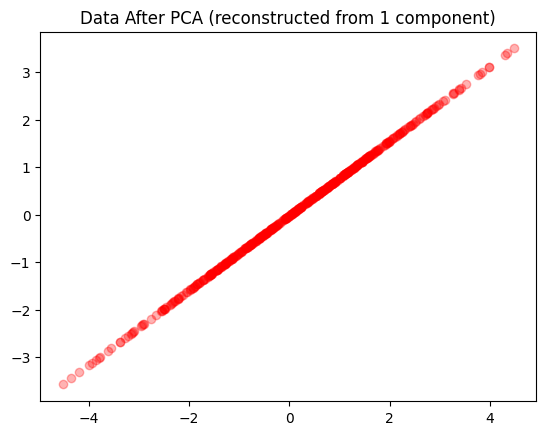

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ساخت داده
np.random.seed(0)
X = np.random.multivariate_normal([0,0], [[3,2],[2,2]], 500)

# رسم داده اصلی
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.title("Original Data (2D)")
plt.show()

# PCA
pca = PCA(n_components=1)
X_new = pca.fit_transform(X)

# بازسازی دوبعدی
X_back = pca.inverse_transform(X_new)

plt.scatter(X_back[:,0], X_back[:,1], alpha=0.3, color='red')
plt.title("Data After PCA (reconstructed from 1 component)")
plt.show()


مثال واقعی مهم — Iris دیتاست

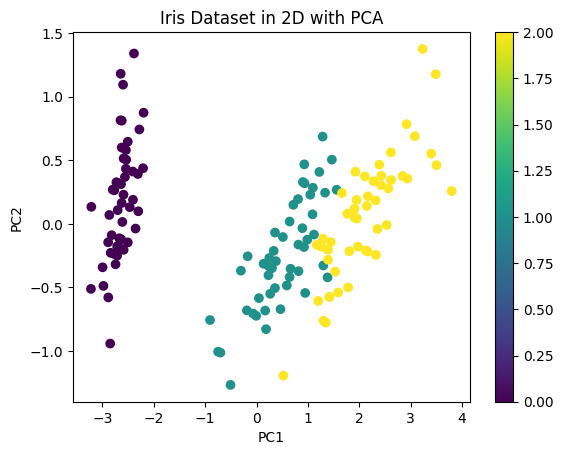

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

plt.scatter(X2[:,0], X2[:,1], c=y)
plt.title("Iris Dataset in 2D with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()


PCA روی تصاویر – مثال جذاب برای کلاس

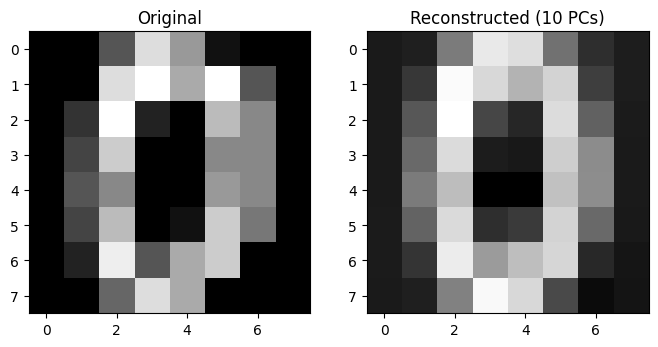

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

# کاهش ابعاد به 10 مؤلفه
pca = PCA(10)
X_reduced = pca.fit_transform(X)
X_back = pca.inverse_transform(X_reduced)

# نمایش تصویر اصلی و بازسازی‌شده
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(X[0].reshape(8,8), cmap='gray')
plt.title("Original")

plt.subplot(122)
plt.imshow(X_back[0].reshape(8,8), cmap='gray')
plt.title("Reconstructed (10 PCs)")
plt.show()
